# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
np.random.seed(0)

# Loading the Datasets

In [2]:
train = pd.read_csv('/kaggle/input/mlolympiadbd2024/train.csv', index_col='ID').drop('Date', axis=1)
test = pd.read_csv('/kaggle/input/mlolympiadbd2024/test.csv', index_col='ID').drop('Date', axis=1)
sample_submission = pd.read_csv('/kaggle/input/mlolympiadbd2024/sample_submission.csv', index_col='ID')
print("Loading Datasets done...")

Loading Datasets done...


In [3]:
train.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
ID,,,,,,,,,,,,,,,,,,,,
1,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8
2,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7
3,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
4,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8
5,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8


In [4]:
test.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
ID,,,,,,,,,,,,,,,,,,,
1,12.7,17.0,9.0,19.7,0.0,3.2,10.8,W,31,W,ESE,17,13,50,39,1015.8,1013.3,1,1
2,11.9,18.6,8.0,18.8,0.0,4.0,10.4,WNW,31,W,ENE,11,19,61,46,1018.0,1012.0,5,1
3,14.4,20.6,11.2,20.8,2.8,5.6,8.0,SW,52,WNW,WSW,20,24,69,28,1006.0,1005.6,3,6
4,13.7,18.3,12.5,19.5,20.4,4.0,5.7,S,48,SSW,S,19,20,92,54,1021.5,1020.5,7,2
5,15.2,18.7,11.5,21.7,0.0,2.8,9.3,ESE,37,WNW,SE,17,24,68,53,1022.3,1019.6,1,5


# Exploratory Data Analysis

In [5]:
train = train.dropna(how='any')
test = test.dropna(how='any')

In [6]:
mapping = {'W': 1, 'NNW': 2, 'WNW': 3, 'ENE': 4, 'NNE': 5, 'NW': 6, 'SSE': 7, 'NE': 8,
           'ESE': 9, 'WSW': 10, 'SE': 11, 'SW': 12, 'N': 13, 'E': 14, 'SSW': 15, 'S': 16}
columns_to_replace = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

train[columns_to_replace] = train[columns_to_replace].replace(mapping)
test[columns_to_replace] = test[columns_to_replace].replace(mapping)

/tmp/ipykernel_17/4217034869.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[columns_to_replace] = train[columns_to_replace].replace(mapping)
/tmp/ipykernel_17/4217034869.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[columns_to_replace] = test[columns_to_replace].replace(mapping)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2616 entries, 1 to 2616
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp9am        2616 non-null   float64
 1   Temp3pm        2616 non-null   float64
 2   MinTemp        2616 non-null   float64
 3   MaxTemp        2616 non-null   float64
 4   Rainfall       2616 non-null   float64
 5   RainToday      2616 non-null   object 
 6   Evaporation    2616 non-null   float64
 7   Sunshine       2616 non-null   float64
 8   WindGustDir    2616 non-null   int64  
 9   WindGustSpeed  2616 non-null   int64  
 10  WindDir9am     2616 non-null   int64  
 11  WindDir3pm     2616 non-null   int64  
 12  WindSpeed9am   2616 non-null   int64  
 13  WindSpeed3pm   2616 non-null   int64  
 14  Humidity9am    2616 non-null   int64  
 15  Humidity3pm    2616 non-null   int64  
 16  Pressure9am    2616 non-null   float64
 17  Pressure3pm    2616 non-null   float64
 18  Cloud9am     

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 1 to 655
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp9am        655 non-null    float64
 1   Temp3pm        655 non-null    float64
 2   MinTemp        655 non-null    float64
 3   MaxTemp        655 non-null    float64
 4   Rainfall       655 non-null    float64
 5   Evaporation    655 non-null    float64
 6   Sunshine       655 non-null    float64
 7   WindGustDir    655 non-null    int64  
 8   WindGustSpeed  655 non-null    int64  
 9   WindDir9am     655 non-null    int64  
 10  WindDir3pm     655 non-null    int64  
 11  WindSpeed9am   655 non-null    int64  
 12  WindSpeed3pm   655 non-null    int64  
 13  Humidity9am    655 non-null    int64  
 14  Humidity3pm    655 non-null    int64  
 15  Pressure9am    655 non-null    float64
 16  Pressure3pm    655 non-null    float64
 17  Cloud9am       655 non-null    int64  
 18  Cloud3pm       

In [9]:
train.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000
mean,17.509442,21.287691,14.606613,22.715443,3.211544,5.012194,7.130849,4.982416,41.496177,5.444190,9.188073,15.087156,19.201835,69.007263,55.034786,1018.351835,1016.026450,4.318043,4.140291
std,4.875282,4.245504,4.547226,4.413463,9.603198,2.681782,3.817394,4.967319,10.452441,5.225612,4.620739,7.040830,7.520868,15.125819,16.449190,7.005411,6.994476,2.481240,2.353104
min,6.400000,10.200000,4.300000,11.900000,0.000000,0.000000,0.000000,1.000000,17.000000,1.000000,1.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.500000,18.200000,10.700000,19.400000,0.000000,3.000000,4.100000,1.000000,37.000000,1.000000,5.000000,11.000000,15.000000,59.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,17.700000,21.000000,14.600000,22.500000,0.000000,4.600000,8.250000,2.000000,41.000000,3.000000,9.000000,15.000000,19.000000,70.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.400000,24.300000,18.600000,25.700000,1.400000,6.800000,10.200000,8.000000,43.000000,10.000000,14.000000,20.000000,24.000000,80.000000,65.000000,1023.200000,1020.800000,7.000000,6.000000
max,33.700000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,16.000000,96.000000,16.000000,16.000000,54.000000,50.000000,100.000000,99.000000,1038.000000,1036.700000,9.000000,8.000000


In [10]:
test.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000
mean,19.067634,22.565954,15.957405,24.164275,3.863817,5.829160,7.321221,7.574046,41.396947,6.000000,9.108397,15.036641,19.664122,65.195420,53.355725,1018.264885,1015.909771,4.320611,4.319084
std,4.773861,4.352572,4.425835,4.577555,11.078045,2.955111,3.809363,5.025647,12.128315,5.235436,4.359128,7.061019,7.170926,14.543249,15.521619,7.083373,7.125249,2.703682,2.627865
min,7.400000,11.000000,5.600000,11.700000,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,1.000000,0.000000,2.000000,21.000000,13.000000,998.300000,994.000000,0.000000,0.000000
25%,15.500000,19.400000,12.500000,20.800000,0.000000,3.600000,4.550000,4.000000,31.000000,1.000000,6.000000,11.000000,15.000000,56.000000,44.500000,1013.950000,1011.500000,1.000000,2.000000
50%,19.500000,22.300000,16.200000,24.000000,0.000000,5.400000,8.300000,7.000000,41.000000,3.000000,9.000000,15.000000,20.000000,65.000000,54.000000,1018.400000,1016.500000,5.000000,5.000000
75%,22.650000,25.500000,19.550000,26.800000,1.400000,7.800000,10.200000,11.000000,48.000000,10.000000,14.000000,19.000000,24.000000,75.000000,62.500000,1022.950000,1020.550000,7.000000,7.000000
max,36.500000,40.700000,27.100000,40.900000,94.400000,15.800000,13.500000,16.000000,96.000000,16.000000,16.000000,44.000000,57.000000,94.000000,91.000000,1039.000000,1036.000000,8.000000,8.000000


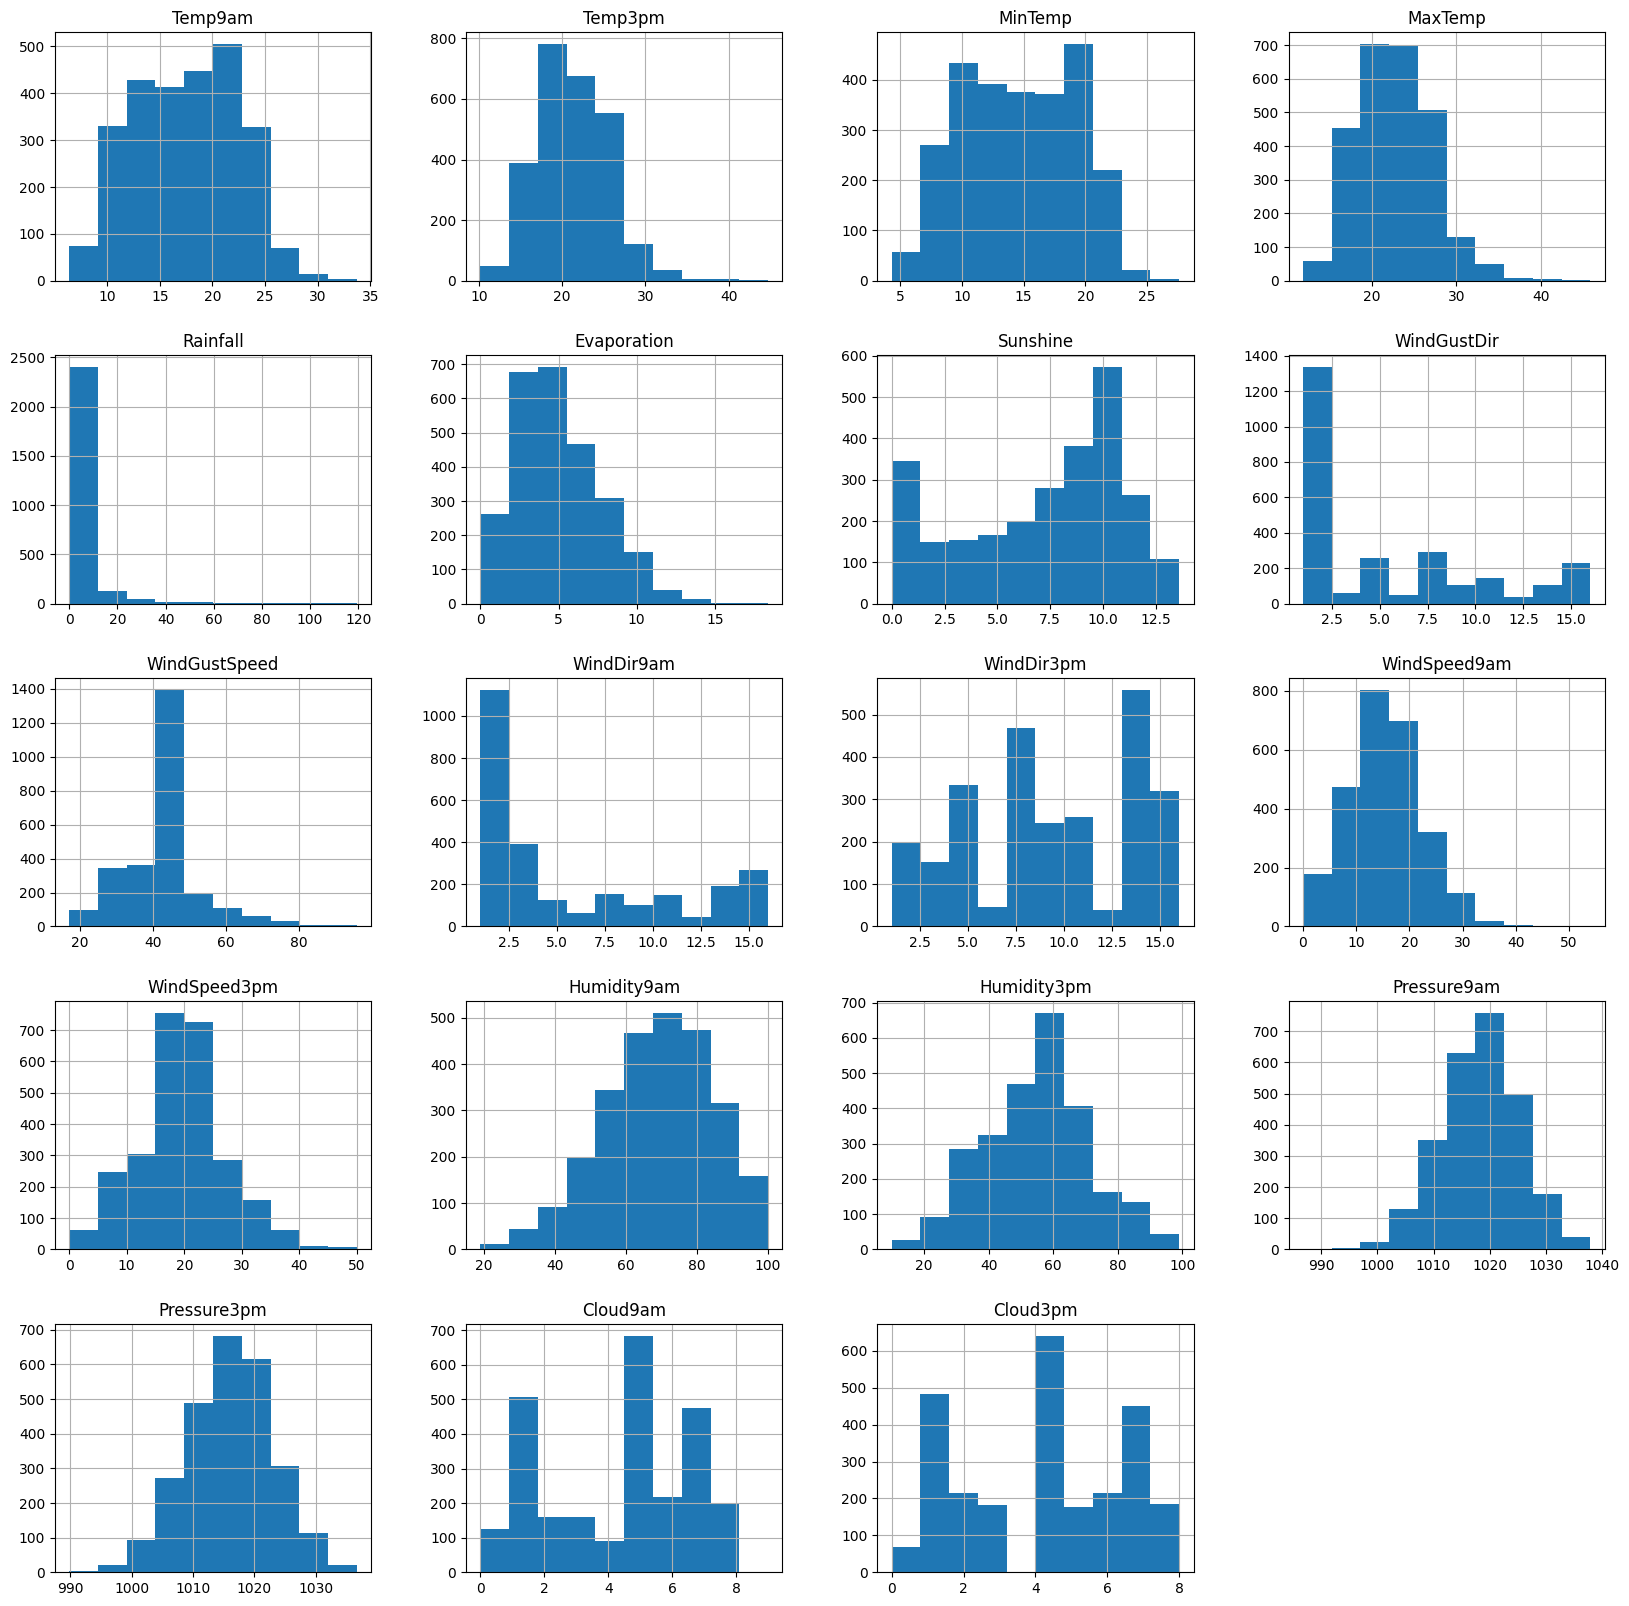

In [11]:
train.hist(figsize=(20,20))
plt.show()

<Axes: >

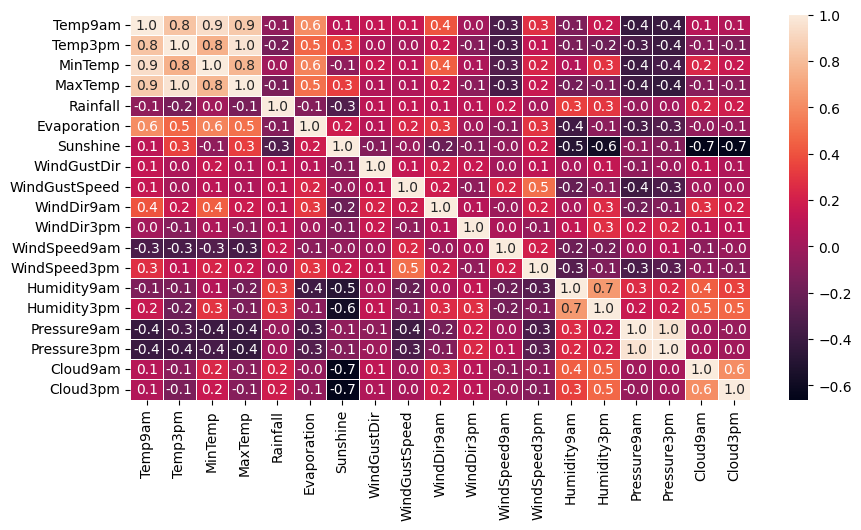

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify which columns have non-numeric data
non_numeric_columns = train.select_dtypes(include=['object']).columns

# Handle non-numeric data, by dropping rows with non-numeric values
train_numeric = train.drop(columns=non_numeric_columns)

# Computing correlation
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(train_numeric.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

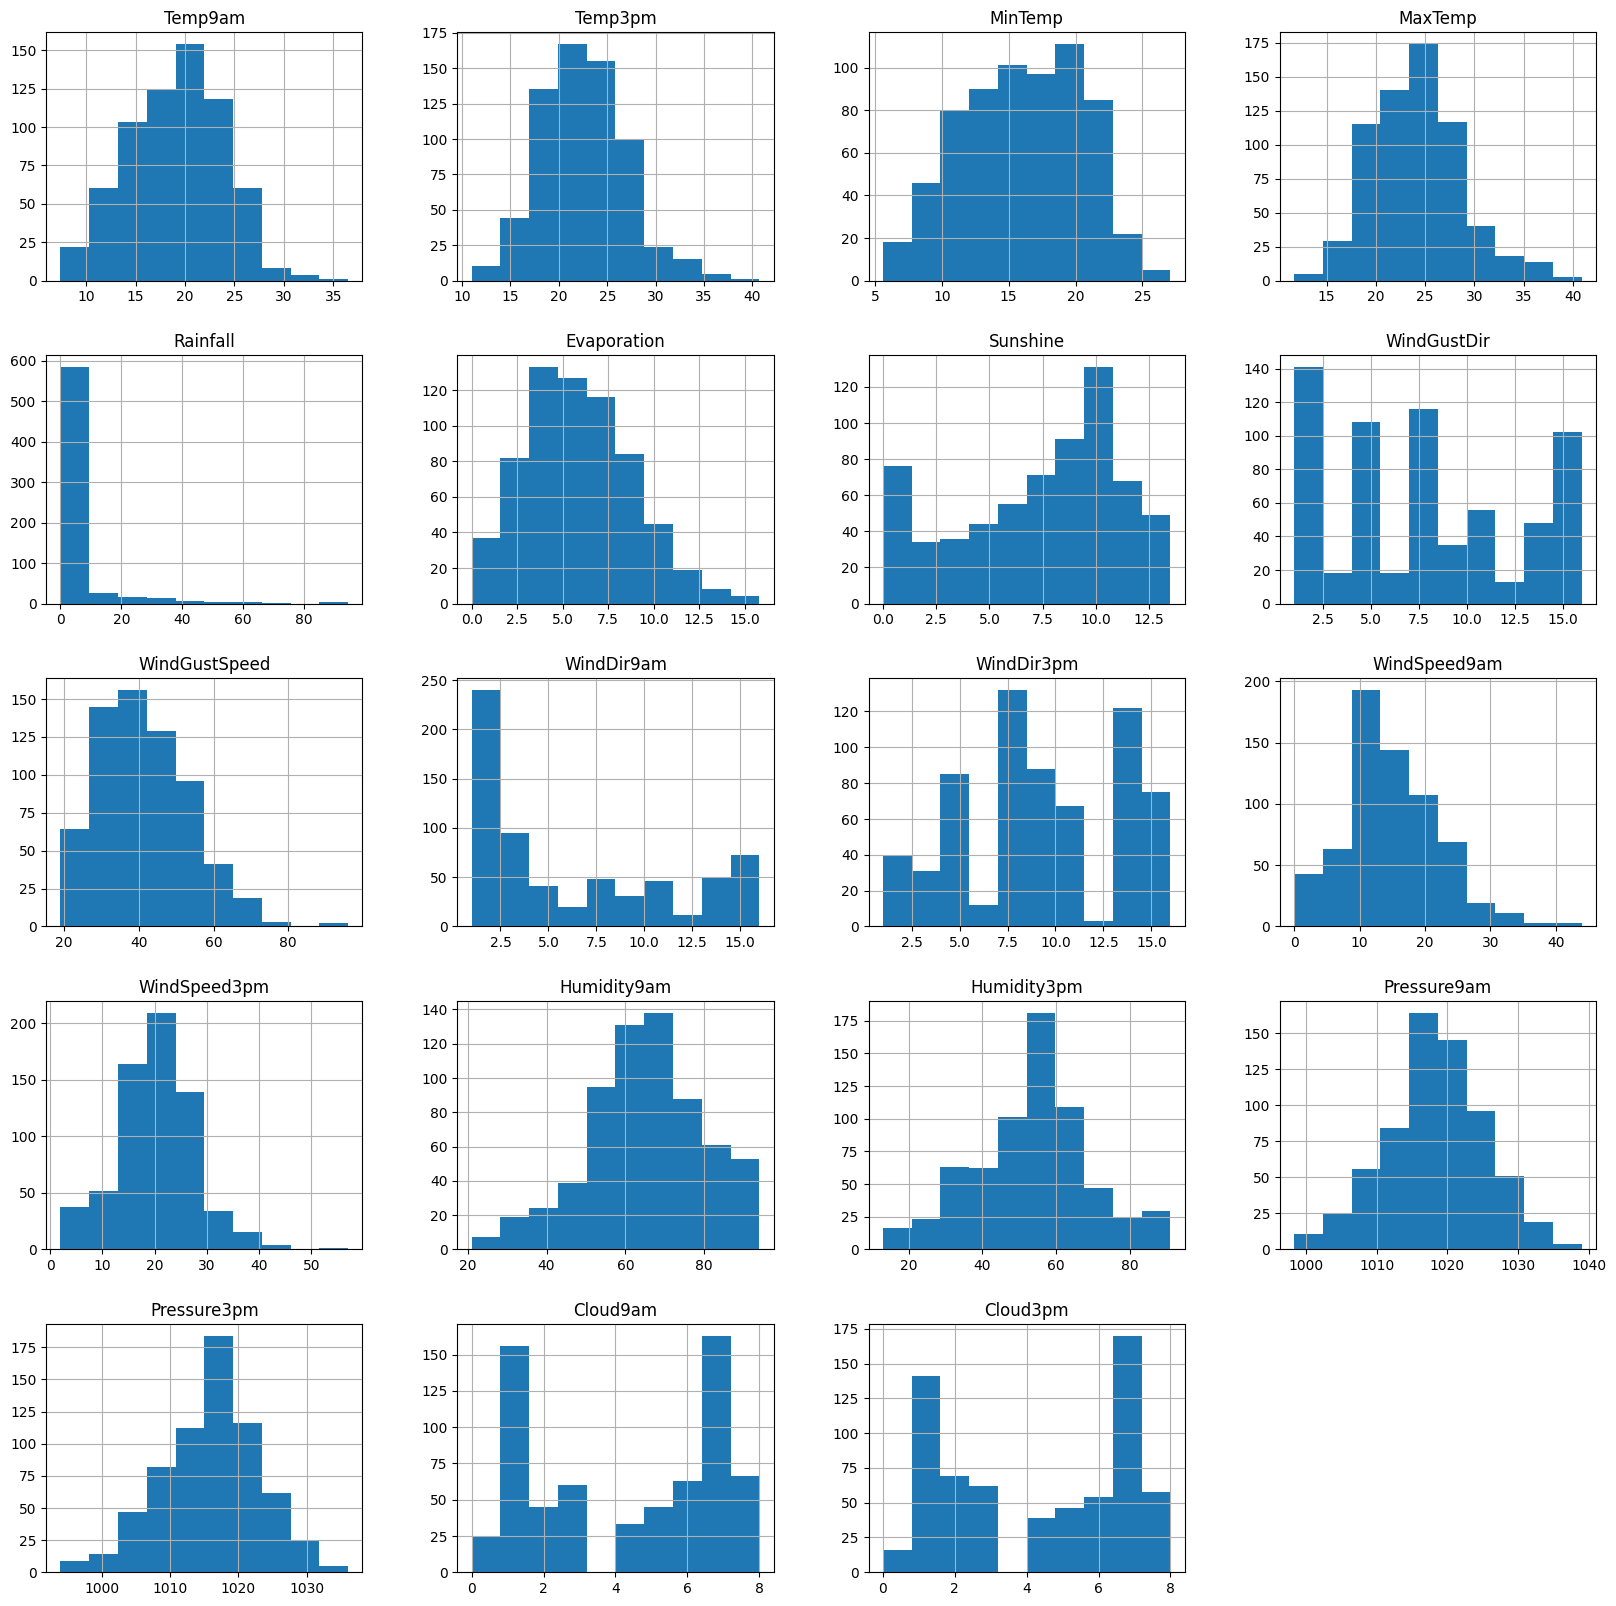

In [13]:
test.hist(figsize=(20,20))
plt.show()

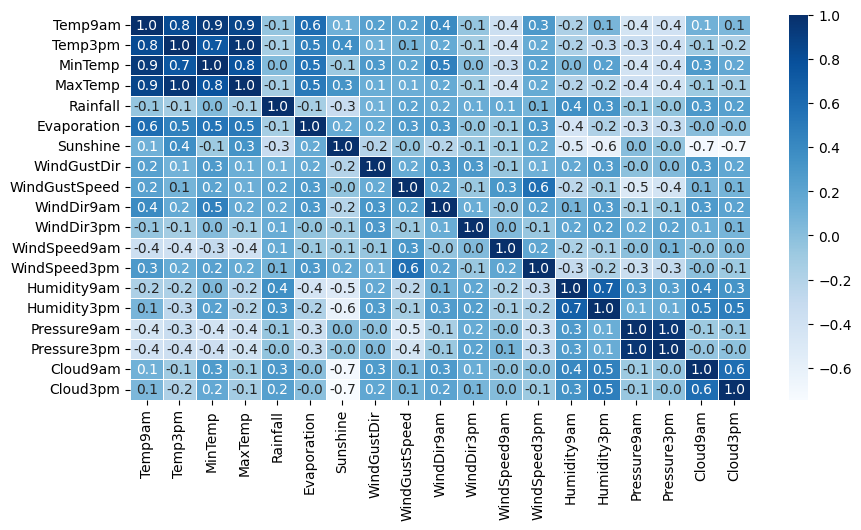

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify which columns have non-numeric data
non_numeric_columns = test.select_dtypes(include=['object']).columns

# Handle non-numeric data, by dropping rows with non-numeric values
test_numeric = test.drop(columns=non_numeric_columns)

# Computing correlation
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(test_numeric.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='Blues')
plt.show()

# Preprocessing

In [15]:
train['RainToday'] = train['RainToday'].map({'Yes':1, 'No':0})

In [16]:
import pandas as pd

columns_to_average = {
    'AvgTemp': ['MinTemp', 'MaxTemp'],
    'AvgWindDir': ['WindDir9am', 'WindDir3pm'],
    'AvgWindSpeed': ['WindSpeed9am', 'WindSpeed3pm'],
    'AvgHumidity': ['Humidity9am', 'Humidity3pm'],
    'AvgPressure': ['Pressure9am', 'Pressure3pm'],
    'AvgCloud': ['Cloud9am', 'Cloud3pm']
}

for new_column, columns_to_average in columns_to_average.items():
    train[new_column] = train[columns_to_average].mean(axis=1)

train = train.drop(columns=['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'WindDir9am', 'WindDir3pm', 
                        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
                        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'])

In [17]:
train.head()

,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,WindGustSpeed,AvgTemp,AvgWindDir,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud
ID,,,,,,,,,,,,
1,15.6,1,6.2,0.0,1,41,20.95,15.5,18.5,88.0,1017.50,8.0
2,6.0,1,3.4,2.7,1,41,22.55,7.5,11.0,78.0,1017.15,7.0
3,6.6,1,2.4,0.1,1,41,23.05,9.0,9.5,87.0,1016.15,7.5
4,18.8,1,2.2,0.0,1,41,21.50,9.5,21.0,86.5,1013.00,8.0
5,77.4,1,4.8,0.0,1,41,22.70,3.0,8.5,81.0,1006.55,8.0


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train['AvgPressure'] = scaler.fit_transform(train['AvgPressure'].values.reshape(-1, 1))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

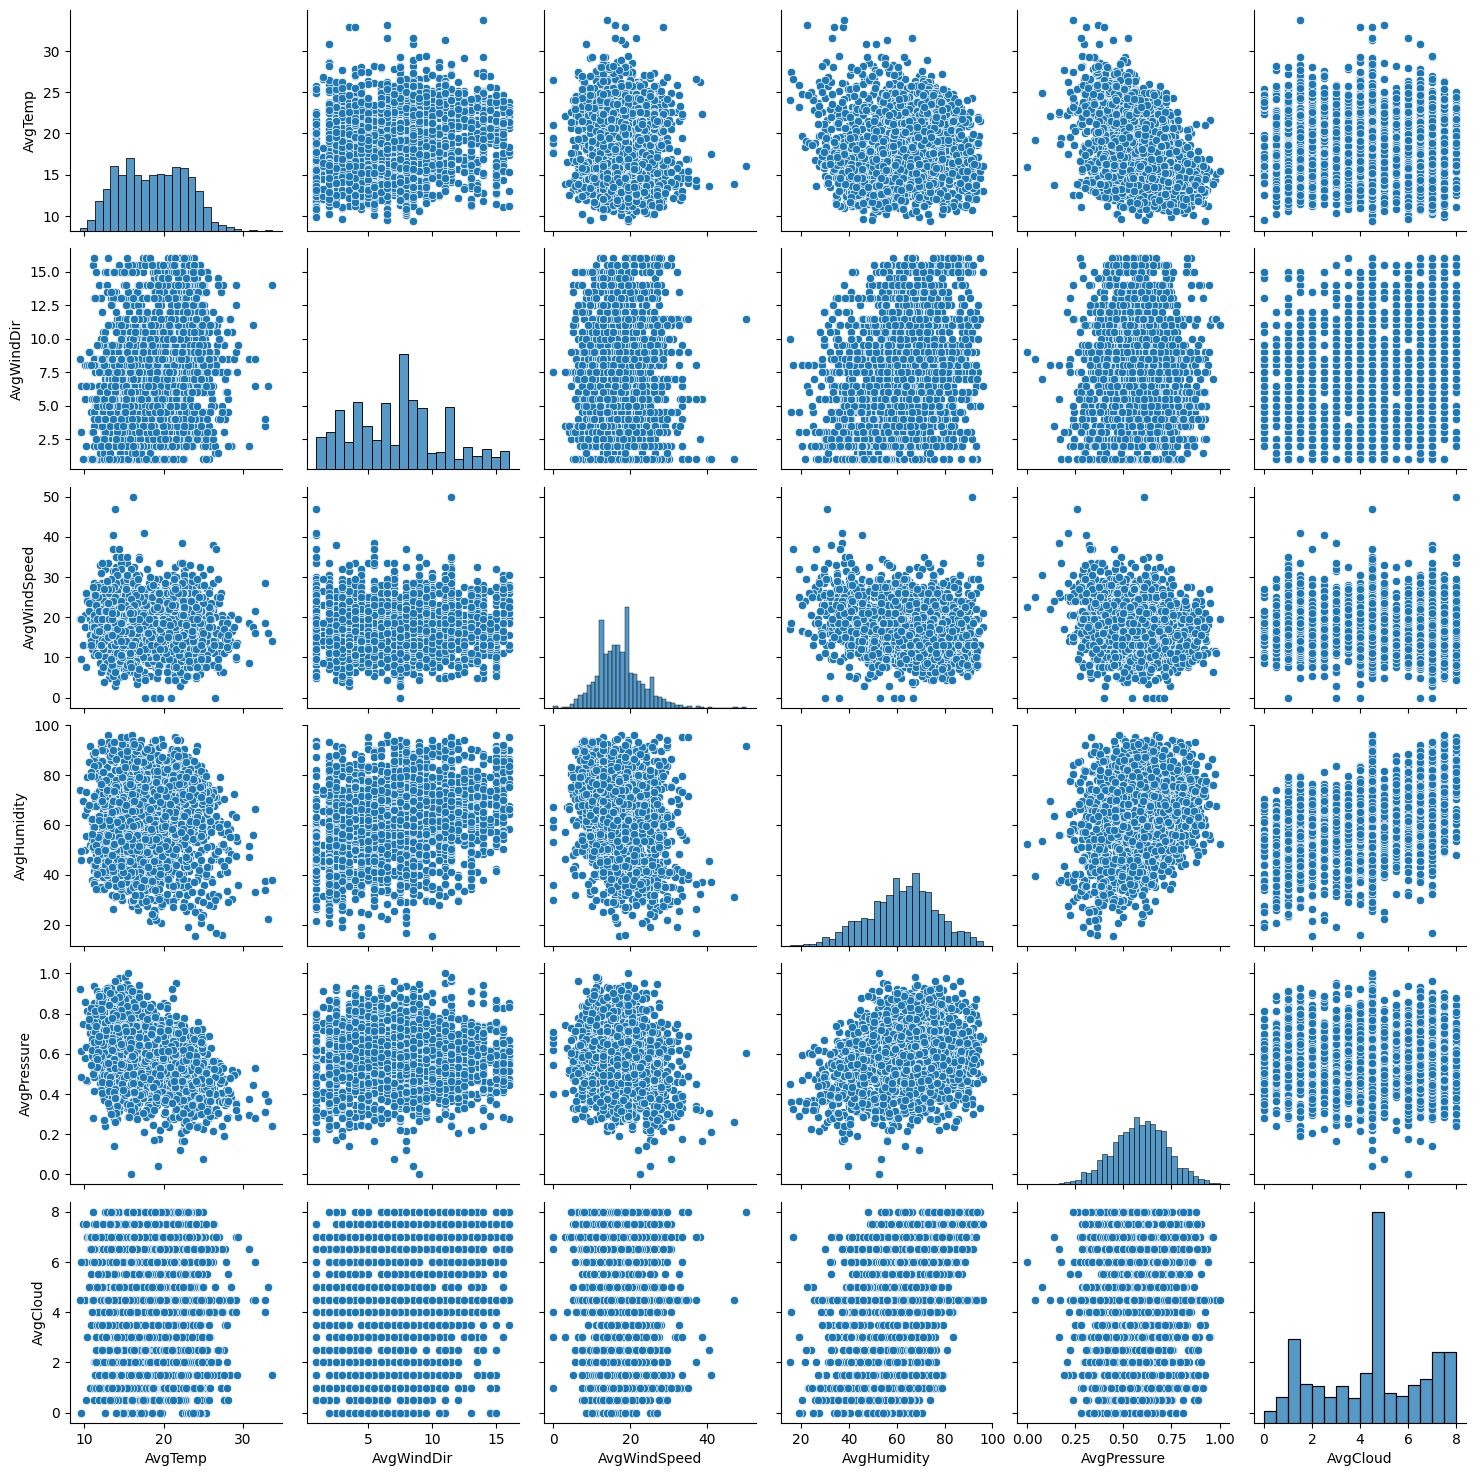

In [19]:
import seaborn as sns

specific_columns = ['AvgTemp', 'AvgWindDir', 'AvgWindSpeed', 'AvgHumidity', 'AvgPressure', 'AvgCloud']

# Subset the DataFrame with only the specific columns
subset_train = train[specific_columns]

# Create the pairplot
sns.pairplot(subset_train)

# Show the plot
plt.show()

In [20]:
import pandas as pd

columns_to_average = {
    'AvgTemp': ['MinTemp', 'MaxTemp'],
    'AvgWindDir': ['WindDir9am', 'WindDir3pm'],
    'AvgWindSpeed': ['WindSpeed9am', 'WindSpeed3pm'],
    'AvgHumidity': ['Humidity9am', 'Humidity3pm'],
    'AvgPressure': ['Pressure9am', 'Pressure3pm'],
    'AvgCloud': ['Cloud9am', 'Cloud3pm']
}

for new_column, columns_to_average in columns_to_average.items():
    test[new_column] = test[columns_to_average].mean(axis=1)

test = test.drop(columns=['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'WindDir9am', 'WindDir3pm', 
                        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
                        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'])

In [21]:
test.head()

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,AvgTemp,AvgWindDir,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud
ID,,,,,,,,,,,
1,0.0,3.2,10.8,1,31,14.35,5.0,15.0,44.5,1014.55,1.0
2,0.0,4.0,10.4,3,31,13.40,2.5,15.0,53.5,1015.00,3.0
3,2.8,5.6,8.0,12,52,16.00,6.5,22.0,48.5,1005.80,4.5
4,20.4,4.0,5.7,16,48,16.00,15.5,19.5,73.0,1021.00,4.5
5,0.0,2.8,9.3,9,37,16.60,7.0,20.5,60.5,1020.95,3.0


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test['AvgPressure'] = scaler.fit_transform(test['AvgPressure'].values.reshape(-1, 1))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

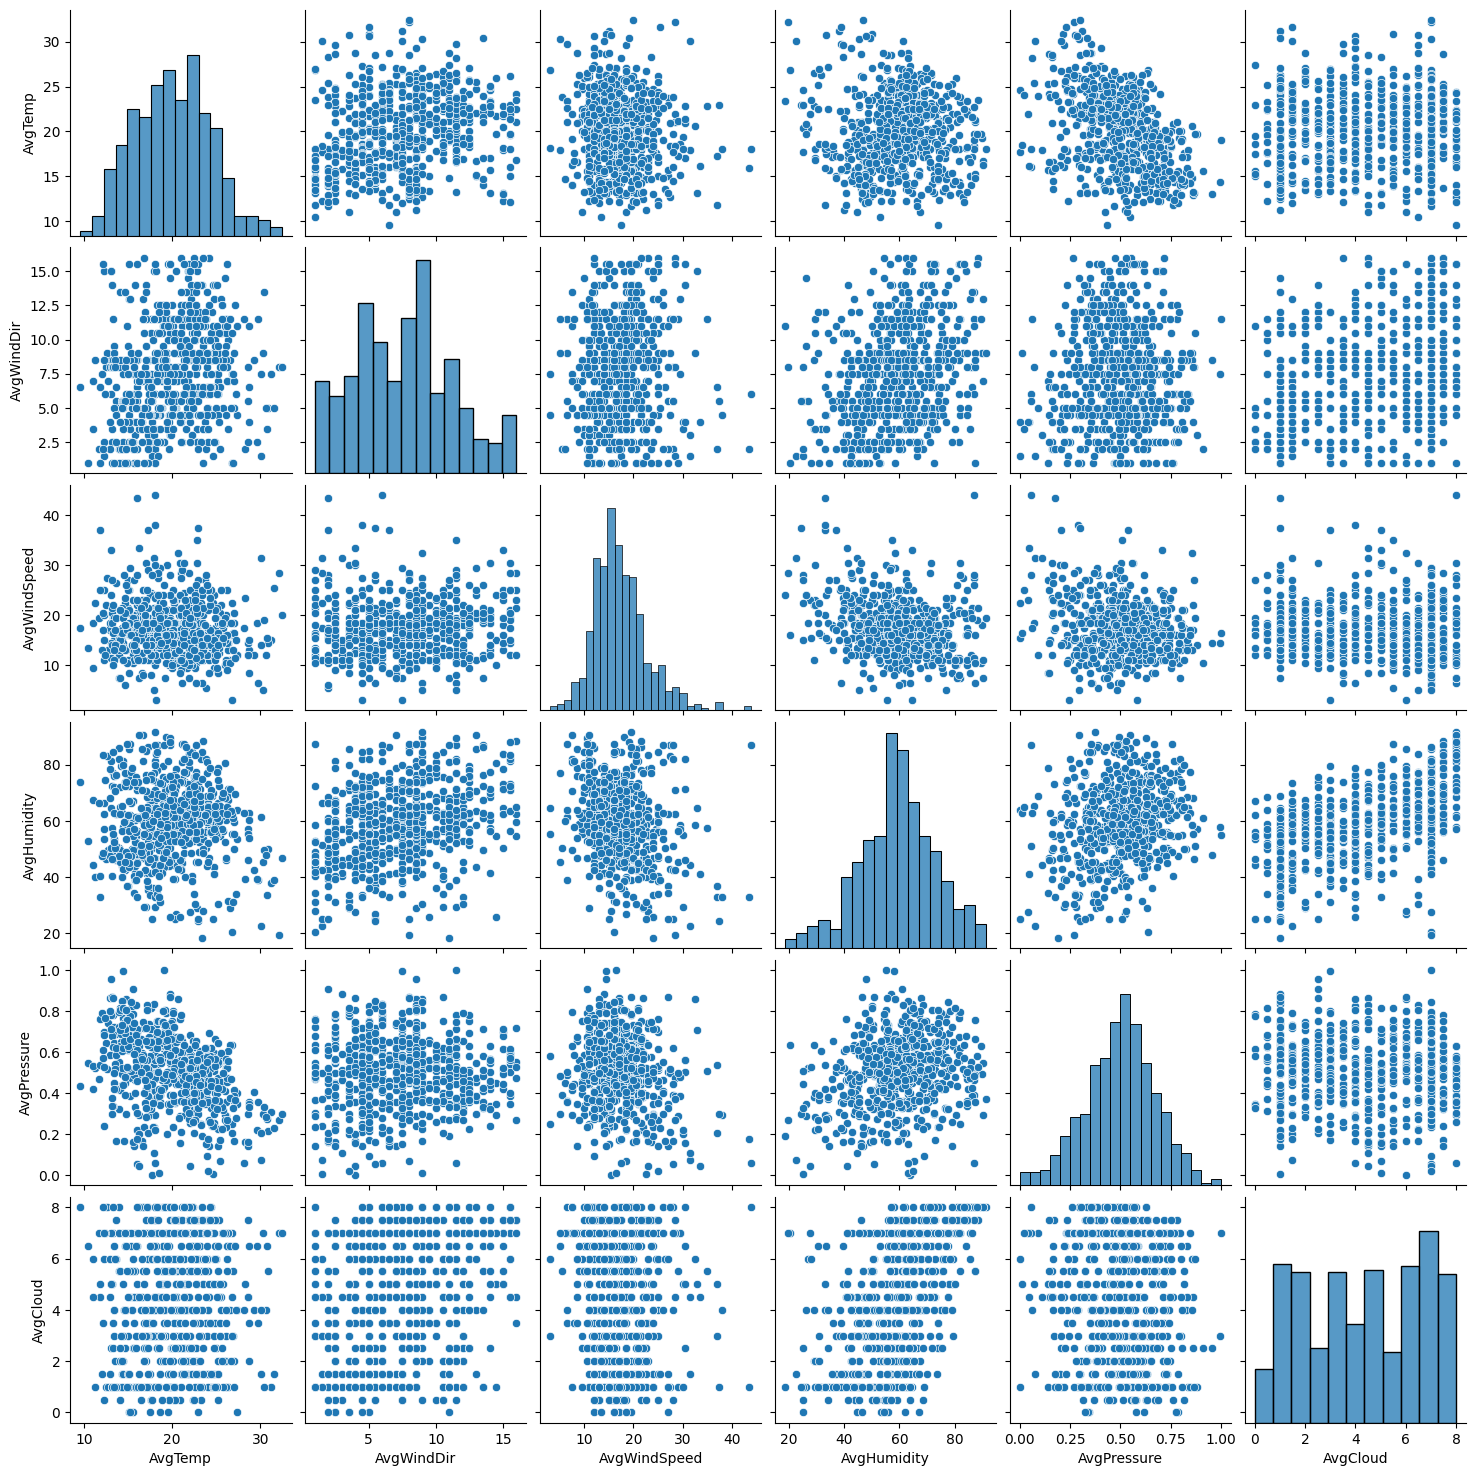

In [23]:
import seaborn as sns

specific_columns = ['AvgTemp', 'AvgWindDir', 'AvgWindSpeed', 'AvgHumidity', 'AvgPressure', 'AvgCloud']

# Subset the DataFrame with only the specific columns
subset_test = test[specific_columns]

# Create the pairplot
sns.pairplot(subset_test)

# Show the plot
plt.show()

# Logistic Regression 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into features (X) and target variable (y)
X = train[['Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'AvgTemp', 'AvgWindDir', 'AvgWindSpeed', 'AvgHumidity', 'AvgPressure', 'AvgCloud']]
y = train['RainToday']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initializing the logistic regression model
log_reg_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Training the model
log_reg_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Displaying accuracy rounded to three decimal places
print("Accuracy:", round(accuracy * 100, 3), "%")

Accuracy: 83.588 %


In [25]:
import joblib

# Save the trained model to a file
joblib.dump(log_reg_model, '/kaggle/working/logistic_regression_model.pkl')

['/kaggle/working/logistic_regression_model.pkl']

# Submission File

In [26]:
import pandas as pd
import joblib

# Load the saved model
loaded_model = joblib.load('/kaggle/working/logistic_regression_model.pkl')

# Used test data
X_specific = test[['Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'AvgTemp', 'AvgWindDir', 'AvgWindSpeed', 'AvgHumidity', 'AvgPressure', 'AvgCloud']]

# Make predictions on the specific dataset
predictions = loaded_model.predict(X_specific)

# Convert the predictions to yes/no labels
predictions = ['Yes' if pred == 1 else 'No' for pred in predictions]

# Generate an ID column
test['ID'] = range(1, len(test) + 1)

# Add the predictions to the specific dataset
test.loc[:, 'Predicted'] = predictions

# Keep only the ID and predicted "RainToday" columns
test = test[['ID', 'Predicted']]

# Save the specific dataset with predictions as a CSV file
test.to_csv('submission.csv', index=False)

print("Generated submission file as csv.")

Generated submission file as csv.


In [27]:
df = pd.read_csv('/kaggle/working/submission.csv')

df

,ID,Predicted
0,1,No
1,2,No
2,3,No
3,4,Yes
4,5,No
...,...,...
650,651,No
651,652,No
652,653,No
653,654,No
